In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Converts invalid entries to NaN
df['TotalCharges'] = df['TotalCharges'].fillna(0)  # Replace NaN with 0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.isnull().sum().sum()

0

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.duplicated().sum()

0

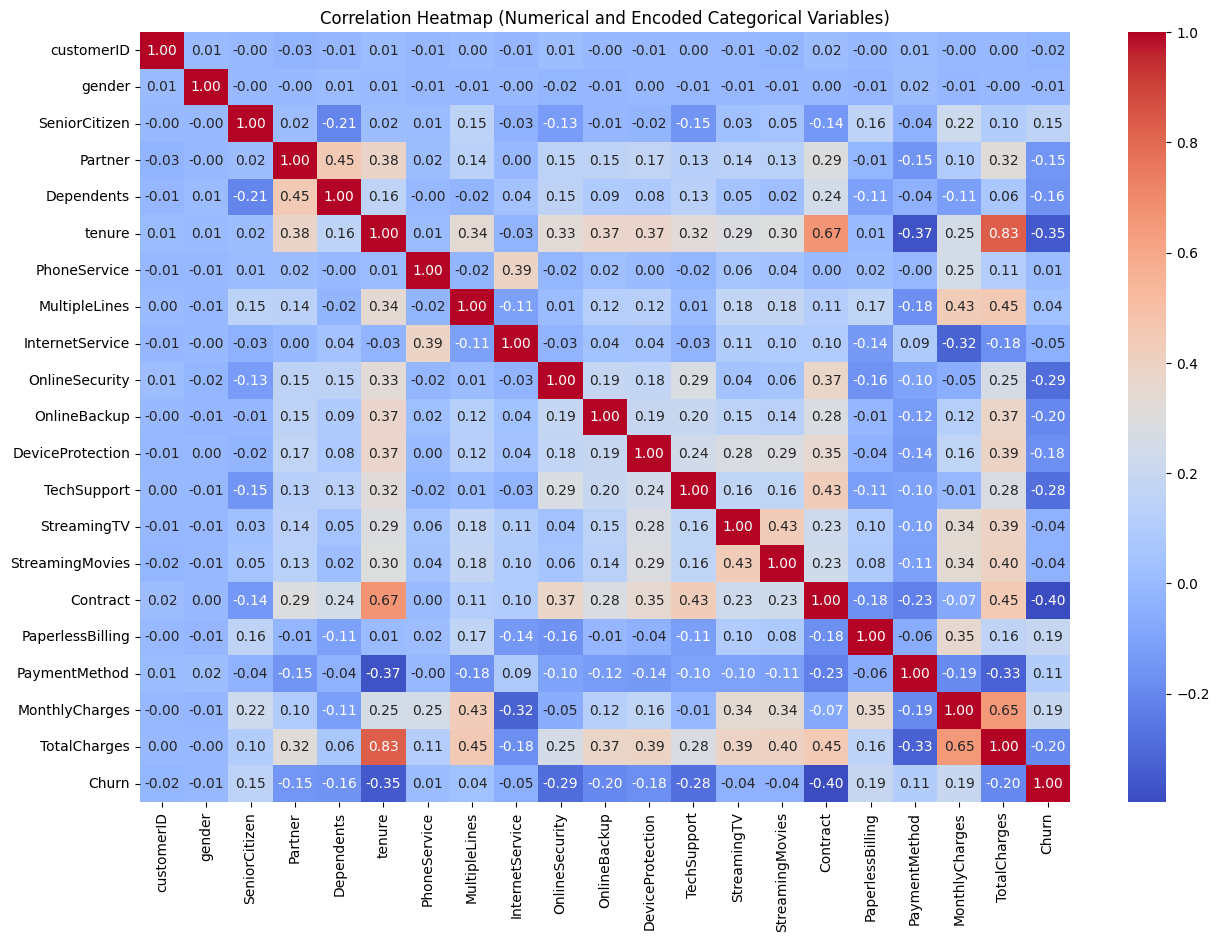

In [16]:
df_encoded = df.copy()

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df[col])

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical and Encoded Categorical Variables)')
plt.show()

In [ ]:
df['customerID'].duplicated().sum()

0

check always that for duplicates which has unique values (primary key) that it should not have duplicates.¶

In [17]:
def conv(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)


In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


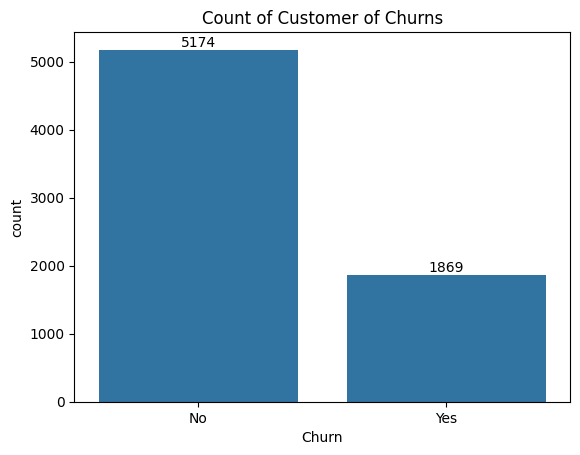

In [19]:
ax = sns.countplot(x = 'Churn',data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer of Churns")
plt.show()

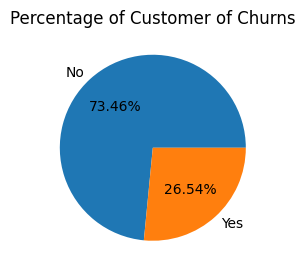

In [20]:

plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn' : "count"})
plt.pie(gb['Churn'], labels = gb.index,autopct = "%1.2f%%")
plt.title("Percentage of Customer of Churns")
plt.show()



from the given pie chart we can see that 26.54% of our customers have churned out  ## now find the reason behind it

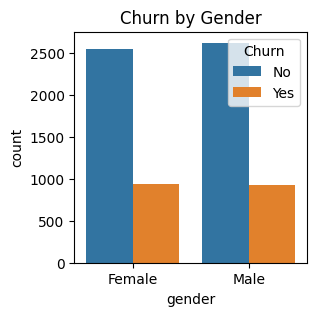

In [21]:
plt.figure(figsize = (3,3))
sns.countplot(x='gender',data = df, hue = 'Churn')
plt.title('Churn by Gender')
plt.show()

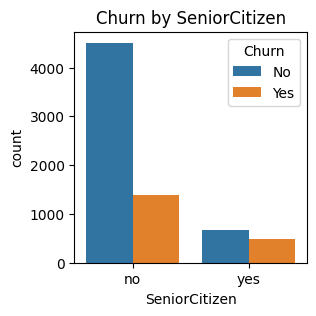

In [22]:
plt.figure(figsize = (3,3))
sns.countplot(x='SeniorCitizen',data = df, hue = 'Churn')
plt.title('Churn by SeniorCitizen')
plt.show()

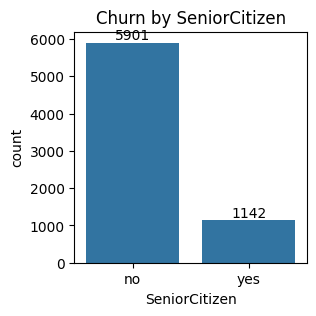

In [23]:
plt.figure(figsize = (3,3))
ax = sns.countplot(x='SeniorCitizen',data = df)
ax.bar_label(ax.containers[0])
plt.title('Churn by SeniorCitizen')
plt.show()

<ipython-input-24-8509fbf539c3>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=(bottom_bar[idx] - val / 2),  # Position in the middle of each bar


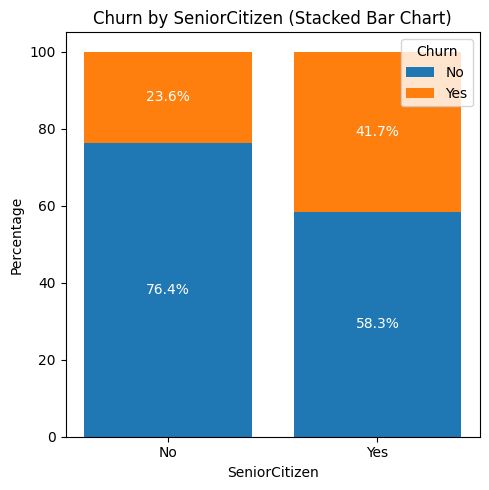

In [24]:
# Count occurrences
data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
data_percentage = data.div(data.sum(axis=1), axis=0) * 100  # Calculate percentages

# Plotting
plt.figure(figsize=(5, 5))
bottom_bar = None

for i, column in enumerate(data_percentage.columns):
    # Stacked bar chart
    plt.bar(data_percentage.index, data_percentage[column], bottom=bottom_bar, label=column)
    if bottom_bar is None:
        bottom_bar = data_percentage[column]
    else:
        bottom_bar += data_percentage[column]

    # Add percentage labels
    for idx, val in enumerate(data_percentage[column]):
        plt.text(x=data_percentage.index[idx],
                 y=(bottom_bar[idx] - val / 2),  # Position in the middle of each bar
                 s=f'{val:.1f}%',
                 ha='center',
                 va='center',
                 color='white')

# Customizing plot
plt.title('Churn by SeniorCitizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'])  # Assuming 0: No, 1: Yes
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

comparative a greated percentage of people in senior cictizen category have churned out

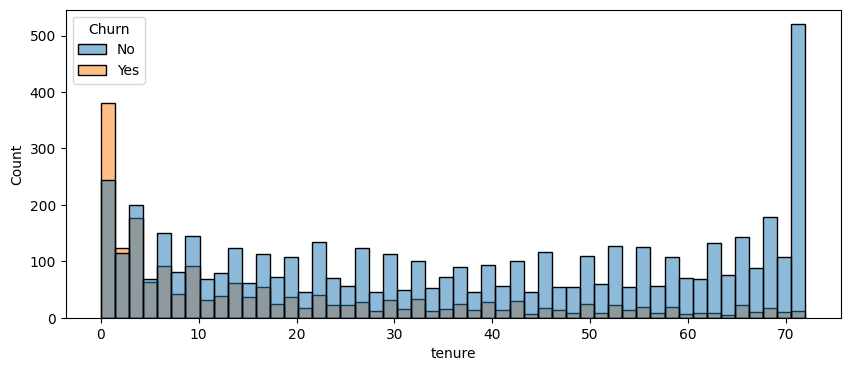

In [25]:
plt.figure(figsize = (10,4))
sns.histplot(x = 'tenure',data = df , bins = 50 , hue = 'Churn')
plt.show()

people whi used for servcicesfor a long time have stayed and people who have used our services ## 1 or 2 months have churned

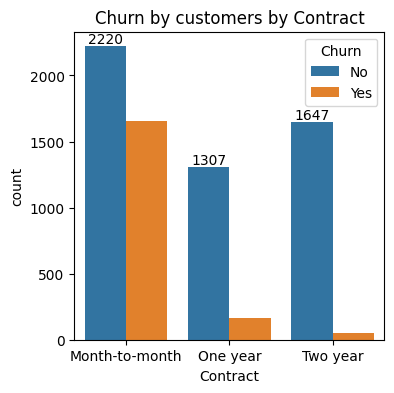

In [26]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x='Contract',data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title('Churn by customers by Contract')
plt.show()

people whi have month to month contract are likely to churn in comparison to one year and two year contract

In [27]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

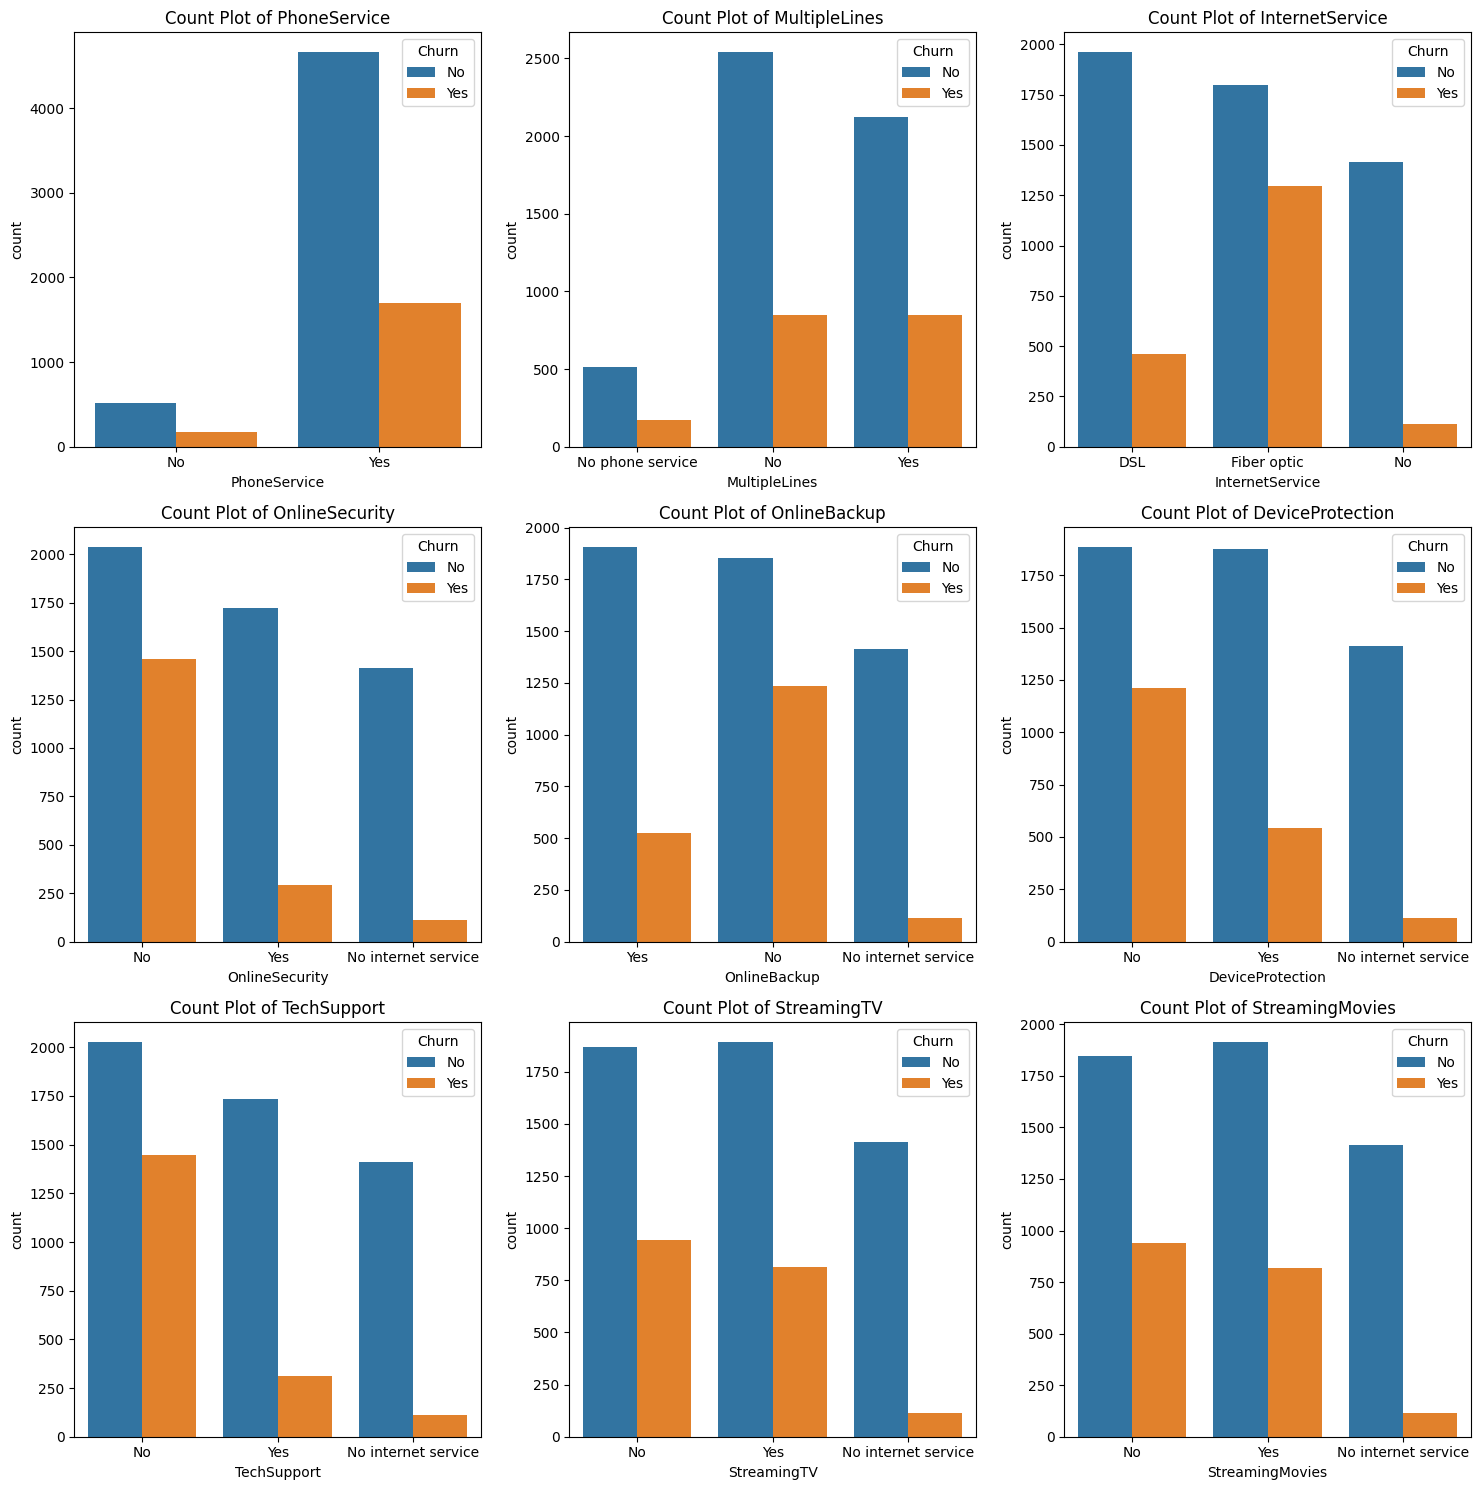

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data - replace this with your actual dataframe
# Assuming `df` is your pandas DataFrame containing the mentioned columns

columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust rows and columns based on number of plots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through columns and create count plots
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i] , hue = 'Churn')
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].tick_params(axis='x', rotation=0)  # Rotate labels if needed

# Adjust layout
plt.tight_layout()
plt.show()


Most service categories show higher counts for customers without the service (No), with some exceptions like InternetService, where Fiber optic users have a higher churn rate. Overall, the plots reveal service usage patterns and their correlation with churn rates.

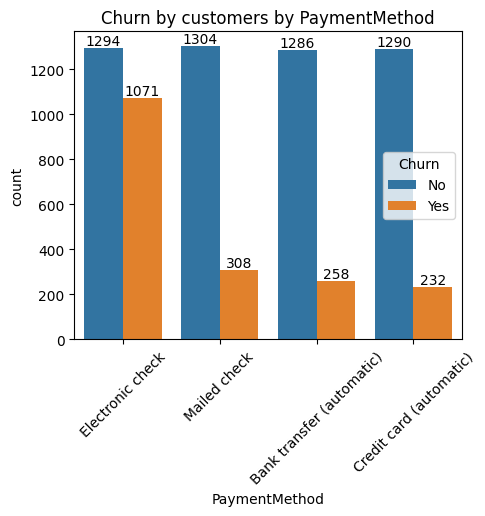

In [29]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x='PaymentMethod',data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn by customers by PaymentMethod')
plt.xticks(rotation = 45)
plt.show()

customer is likelyt to churn when he is using electronic check as payment method

In [31]:
 df_cleaned_data = df.drop(columns = ['gender','customerID','StreamingTV','StreamingMovies','MultipleLines','PhoneService'])


In [32]:
df_cleaned_data

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,no,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,no,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,no,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,no,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,no,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,no,Yes,Yes,24,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,no,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,no,Yes,Yes,11,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,yes,Yes,No,4,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [36]:
# Chi-Square Test for Categorical Variables
import scipy.stats as stats  # Import the stats module

categorical_features = ['Contract', 'PaymentMethod', 'SeniorCitizen']
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    chi2, p, dof, _ = stats.chi2_contingency(contingency_table)  # Access chi2_contingency from stats
    print(f"Chi-Square Test for {feature}: p-value = {p}")

# ANOVA for Numeric Variables
from scipy.stats import f_oneway  # Import f_oneway directly

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
groups = [df[df['Churn'] == 'Yes'][feature] for feature in numeric_features]
for feature in numeric_features:
    f_stat, p_val = f_oneway(df[df['Churn'] == 'Yes'][feature], df[df['Churn'] == 'No'][feature])
    print(f"ANOVA Test for {feature}: p-value = {p_val}")

Chi-Square Test for Contract: p-value = 5.863038300673391e-258
Chi-Square Test for PaymentMethod: p-value = 3.6823546520097993e-140
Chi-Square Test for SeniorCitizen: p-value = 1.510066805092378e-36
ANOVA Test for tenure: p-value = 7.999057960610892e-205
ANOVA Test for MonthlyCharges: p-value = 2.7066456068950115e-60
ANOVA Test for TotalCharges: p-value = 2.127211613245422e-63


In [37]:
from sklearn.preprocessing import LabelEncoder

# Encode binary categorical columns
binary_cols = ['Partner','SeniorCitizen', 'Dependents', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'InternetService']
le = LabelEncoder()
for col in binary_cols:
    df_cleaned_data[col] = le.fit_transform(df_cleaned_data[col])

# Check dataset
print(df_cleaned_data.head())




   SeniorCitizen  Partner  Dependents  tenure  InternetService  \
0              0        1           0       1                0   
1              0        0           0      34                0   
2              0        0           0       2                0   
3              0        0           0      45                0   
4              0        0           0       2                1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  Contract  \
0               0             2                 0            0         0   
1               2             0                 2            0         1   
2               2             2                 0            0         0   
3               2             0                 2            2         1   
4               0             0                 0            0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges Churn  
0                 1              2           29.85         29.85    No  


In [41]:
from sklearn.model_selection import train_test_split

X = df_cleaned_data.drop(columns = ['Churn'])
y = df_cleaned_data['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix , classification_report

model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('classification report ',classification_report(y_test,y_pred))
print("confusion mtrix", confusion_matrix(y_test,y_pred))


classification report                precision    recall  f1-score   support

          No       0.82      0.90      0.86      1036
         Yes       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409

confusion mtrix [[936 100]
 [199 174]]


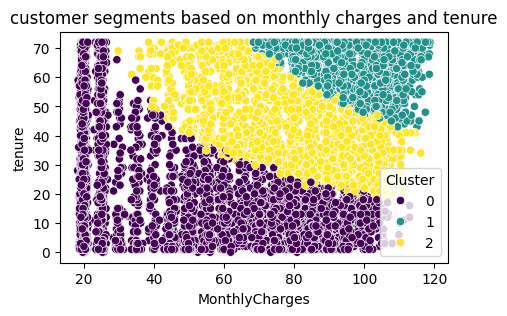

In [44]:
from sklearn.cluster import KMeans

features = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
kmeans = KMeans(n_clusters = 3 ,random_state = 42)
df['Cluster'] = kmeans.fit_predict(features)

plt.figure(figsize = (5,3))
sns.scatterplot(x=df['MonthlyCharges'],y=df['tenure'],hue=df['Cluster'],palette = 'viridis')
plt.title('customer segments based on monthly charges and tenure')
plt.show()

In [45]:

# Filter High-Risk Customers
high_risk = df[(df['Contract'] == 0) & (df['MonthlyCharges'] > 70)]  # Example: Month-to-Month and high charges
print("High-Risk Customers:\n", high_risk.head())

# Suggestions for Retention Strategies
print("Offer retention campaigns to high-risk clusters based on Contract and PaymentMethod analysis.")


High-Risk Customers:
 Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, Cluster]
Index: []

[0 rows x 22 columns]
Offer retention campaigns to high-risk clusters based on Contract and PaymentMethod analysis.


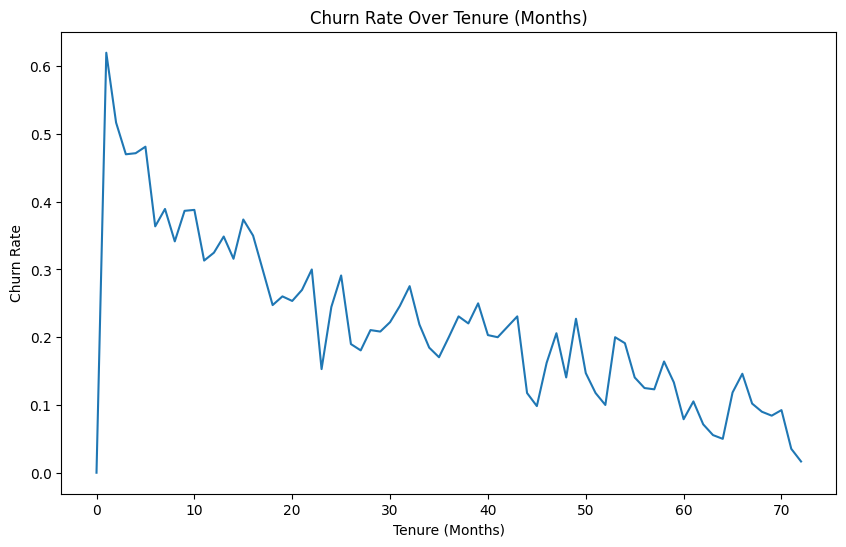

In [46]:
# Monthly Churn Rate Analysis
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
monthly_churn = df.groupby('tenure')['Churn'].mean()

# Plot Monthly Churn Rate
plt.figure(figsize=(10, 6))
monthly_churn.plot()
plt.title("Churn Rate Over Tenure (Months)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate")
plt.show()


In [47]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 13.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=8f81c81d8f201e3bf79b228c0c2cecbdf271cba7da37f4ae8162004e14578339
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


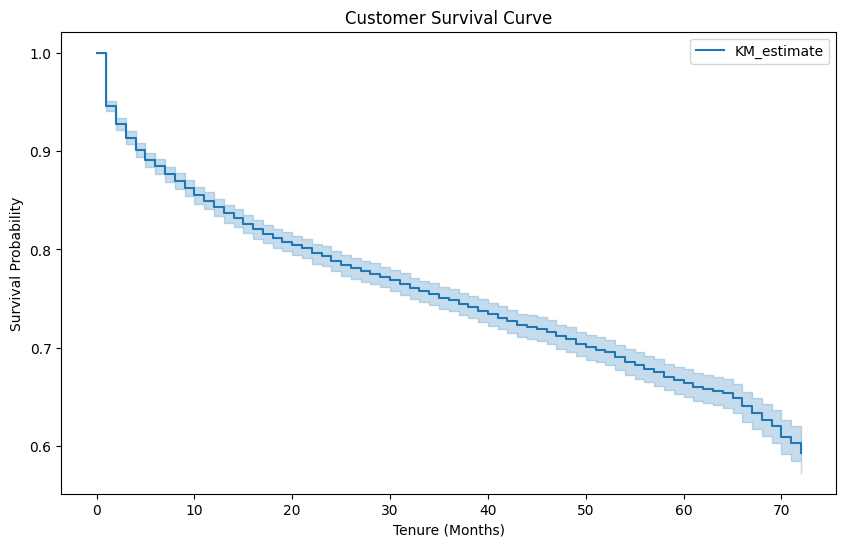

In [48]:
from lifelines import KaplanMeierFitter

# Survival Analysis for Tenure
kmf = KaplanMeierFitter()
kmf.fit(durations=df['tenure'], event_observed=df['Churn'])

# Plot Survival Curve
plt.figure(figsize=(10, 6))
kmf.plot()
plt.title("Customer Survival Curve")
plt.xlabel("Tenure (Months)")
plt.ylabel("Survival Probability")
plt.show()
